<img src="https://i.postimg.cc/1R2d17XR/logo-800-47024e2aeaaa8651c172ba883264dd43.png" alt="Italian Trulli">

**WHAT IS LEAGUE OF LEGENDS?**

League of Legends is a team-based strategy game where two teams of five powerful champions face off to destroy the other’s base. Choose from over 150 champions to make epic plays, secure kills, and take down towers as you battle your way to victory.

**DESTROY THE BASE**

The Nexus is the heart of both teams’ bases. Destroy the enemy’s Nexus first to win the game.

**THE MAP**

<img src="https://www.researchgate.net/profile/Patrick-Shih-2/publication/319839481/figure/fig1/AS:539281729228800@1505586191613/A-Map-of-the-League-of-Legends-game-play-in-the-classic-mode.png" align="right" width="400" height="300">


Blue and Red team fight on the same map every game. Blue side is on the bottom-left corner, and Red side is on the upper-right corner. The map is symmetrical to its center. It is composed of 3 lanes (toplane, midlane, botlane) and jungle between them. Players pick position in accordance with the role they have decided in the champion select, and has to move from their respective Nexus to the correct position. Each time a player dies or decides to back, he spawns at his respective Nexus.

**CLEAR THE PATH**

Your team needs to clear at least one lane to get to the enemy Nexus. Blocking your path are defense structures called turrets and inhibitors. Each lane has three turrets and one inhibitor, and each Nexus is guarded by two turrets.

**TAKE ON THE JUNGLE**

In between the lanes is the jungle, where neutral monsters and jungle plants reside. The two most important monsters are Baron Nashor, the Heralds and the Drakes. Killing these units grants unique buffs for your team and can also turn the tide of the game.

**CHOOSE THE LANE**

There are five positions that make up the recommended team comp for the game. Each lane lends itself to certain kinds of champions and roles—try them all or lock in to the lane that calls you.

**POWER THE CHAMP**

Champions get stronger by earning experience to level up and gold to buy more powerful items as the game progresses. Staying on top of these two factors is crucial to overpowering the enemy team and destroying their base.

**UNLOCK ABILITIES**

Champions have five core abilities, two special spells, and up to seven items at a time. Figuring out the optimal ability order, summoner spells, and item build for your champion will help you succeed as a team.

<a href="https://na.leagueoflegends.com/en-us/how-to-play/">League of Legends Official Website</a>

<a href="https://www.youtube.com/embed/BGtROJeMPeE">What is League of Legends (Youtube)</a>


**DATASET**

This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level…

The column blueWins is the target value. A value of 1 means the blue team has won. 0 otherwise.

There is no missing value.

<a href="https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min">Download Here</a>

In this notebook, we will focus on the following question : 

*Which in-game decisions before 10 min are the most relevant to win the game ?*

To do so :

* We focus on Blue side only, at first.
* We explore the dataset to see some patterns and correlations between features.
* In order to expose the influence of features on the win, we develop a logistic regression and estimate the weight of each relevant feature.
    * To do so, we calculate the correlation coefficient for each pair.
    * We remove or adapt features to avoid correlation for the logistic regression.
    * We remove outliers from remaining features.
    * We estimate weights and do some observations.
* Then, we calculate the % of victory considering each feature.
* We do the same for Red side.
* We conclude on this project.

# Contents

* [<font size=4>1. Libraries</font>](#1)
* [<font size=4>2. First exploratory of the dataset</font>](#2)
* [<font size=4>3. Preparation for the Regression Analysis</font>](#3)
* [<font size=4>4. Logistic Regression analysis</font>](#4)
* [<font size=4>5. Deeper analysis</font>](#5)
* [<font size=4>6. Red side</font>](#6)
* [<font size=4>7. Comparaison between Red and Blue side](#7)
* [<font size=4>8. General conclusions</font>](#8)
* [<font size=4>9. Personnal note</font>](#9)
* [<font size=4>10. Aknowledgment</font>](#10)

# Libraries <a id="1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# First exploratory of the dataset <a id="2"></a>

In [2]:
#Download dataset
raw_data = pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
raw_data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
raw_data.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

The dataset is divided into two sections : Blue & Red

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
#Let's display all the distributions for the blue side only
blue_side_columns = []
for col in raw_data.columns:
       if "blue" in col:
              blue_side_columns.append(col)

In [6]:
#Let's create the dataset for blue side only
blue_data = raw_data[blue_side_columns]

In [7]:
blue_data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [8]:
#describe as a df to visualize all the data
describe_blue = blue_data.describe()

We note an outlier for "blueWardsPlaced" : max=250, which is theoricaly impossible

In [9]:
### PAS UTILE
# #Target
# Target = blue_data['blueWins']
# #Numerical and Categorical data are separated
# Numerical_blue = ['blueWardsPlaced', 'blueWardsDestroyed','blueKills','blueDeaths','blueDeaths','blueAssists','blueEliteMonsters','blueTowersDestroyed','blueTotalGold', 'blueAvgLevel','blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']
# Categorical_blue = ['blueFirstBlood', 'blueDragons', 'blueHeralds']

# Preparation for the regression analysis <a id="3"></a>

## Correlations <a id="31"></a>

<AxesSubplot:>

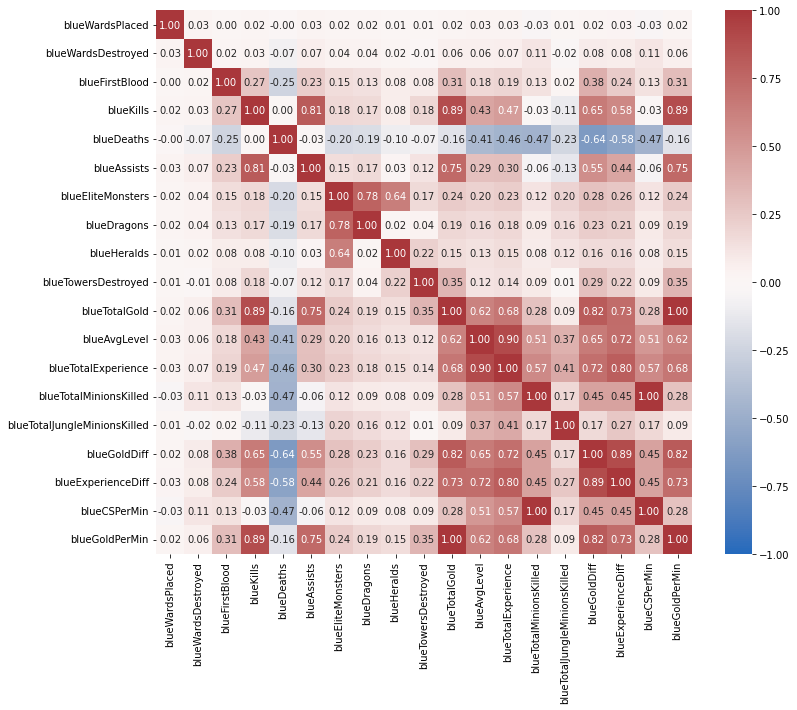

In [10]:
#Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(blue_data.drop("blueWins",axis=1).corr(),cmap='vlag', annot=True, fmt='.2f', vmin=-1)

We note a lot of correlations between features.  
We'll consider a |correlation coefficient| > 0.5 as representative of a high correlation.  
* blueAssists / blueKills : when a team do a kill before 10 min, it could be due to roaming, ganking, or kill at the botlane, leading to assists
* blueDragon / blueEpicMonsters : Dragon are considered as an Epic Monster in the dataset
* blueHerald / blueEpicMonsters : same  => blueDragon + blueHerald = blueEpicMonsters
* blueTotalGolds / blueKills : killing a champion give at least 300g before 10 min, whereas it takes ~15cs to get the same amount
* blueTotalGolds / blueAssists : because blueAssists / blueKills
* blueAvgLevel / blueTotalGold : at 10min, the more gold you have, the more exp you have (killing minions or champions gives also lvl, in addition of giving gold)
* blueTotalExperience / blueTotalGold : same
* blueTotalExperience / blueaverageLevel : having experience leads to levels
* blueTotalMinionsKilled / blueAvgLevel : killing minions gives experience, therefore gives level
* blueTotalExperience / blueTotalMinionsKilled : same
* blueGoldDiff / blueKills : killing enemy champions gives a lot of gold, increasing the difference of gold between teams
* blueGoldDiff / blueDeath : on the opposite, being killed results in being late in term of gold
* blueGoldDiff / blueAssits : Assist & kills are highly correlated
* blueGoldDiff / blueTotalGold : the more gold you have, the more it is likely to have a gold diff
* blueGoldDiff / blueAvgLevel : the more gold you have, the more you killed minions or champions, and so the more experience you'll get
* blueGoldDiff / blueTotalExperience : same
* blueExperienceDiff / blueKills : killing an enemy gives experience, but also deny the opponent getting experience because he has to wait for respawn and has to come in lane after.
* blueExperienceDiff / blueDeath : same idea on the opposite
* blueExperienceDiff / blueTotalGold : if you kill, you get a lot of gold and denying enemy gold and experience (from minions principaly)
* blueExperienceDiff / blueAvgLevel : the higher the average level of the team, the likelier it is that blue Team leads the game in term of exp
* blueExperienceDiff / blueTotalExperience : same
* blueExperienceDiff / blueGoldDiff : same
* blueCsPerMin / blueAvgLevel : killing minions (Creeps Score : CS) gives experience
* blueCsPerMin / blueTotalExperience : same
* blueCsPerMin / blueTotalMinionsKilled : correlation of 1 => logic
* blueGoldPerMin / blueKills
* blueGoldPerMin / blueAssits 
* blueGoldPerMin / blueTotalGold
* blueGoldPerMin / blueAvgLevel
* blueGoldPerMin / blueTotalExperience
* blueGoldPerMin / blueTotalGold
* blueGoldPerMin / blueGoldDiff
* blueGoldPerMin / blueTotalExperience
* blueGoldPerMin / blueExperienceDiff

In regards of these informations, we modify or drop some features :
* Assits & Kills are added together
* EliteMonsters is dropped : we already have this information with Dragon & Helder
* Everything relative to gold is dropped, because a lot of actions in game allow player to earn gold. We will focus on which decisions has to be taken to result in a potential win. We could study the influence of gold later
* Everything relative to experience will be dropped for the same reason
* CsPerMin is dropped : before 10 min, it is not relevant. We keep TotalCS instead
* We keep AvgLevel because of the relative low correlation with others features except gold we have removed

## Cleaning for the logistic regression <a id="32"></a>

In [11]:
#The new Dataframe
blue_data_cleaned = blue_data.copy()

### Assists & Kills

In [12]:
#Assists & Kills
blue_data_cleaned['KA'] = blue_data_cleaned['blueAssists'] + blue_data_cleaned['blueKills']
blue_data_cleaned = blue_data_cleaned.drop(['blueAssists','blueKills'],axis=1)

In [13]:
blue_data_cleaned.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,KA
0,0,28,2,1,6,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,20
1,0,12,1,0,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,10
2,0,15,0,0,11,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,11
3,0,43,1,0,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,9
4,0,75,4,0,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,12


### Gold columns dropped


In [14]:
#Extraction of Gold columns
Gold = []
for column in list(blue_data_cleaned.columns):
    if 'Gold' in column:
        Gold.append(column)
Gold

['blueTotalGold', 'blueGoldDiff', 'blueGoldPerMin']

In [15]:
blue_data_cleaned = blue_data_cleaned.drop(Gold,axis=1)

In [16]:
blue_data_cleaned.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueDeaths', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueExperienceDiff', 'blueCSPerMin', 'KA'],
      dtype='object')

### EliteMonsters drop

In [17]:
blue_data_cleaned = blue_data_cleaned.drop(['blueEliteMonsters'],axis=1)

### Experience

In [18]:
Experience = []
for column in list(blue_data_cleaned.columns):
    if 'Experience' in column:
        Experience.append(column)
Experience

['blueTotalExperience', 'blueExperienceDiff']

In [19]:
blue_data_cleaned = blue_data_cleaned.drop(Experience,axis=1)

### CS per minute

In [20]:
blue_data_cleaned = blue_data_cleaned.drop(['blueCSPerMin'],axis=1)

### Check the correlation in the cleaned Data

<AxesSubplot:>

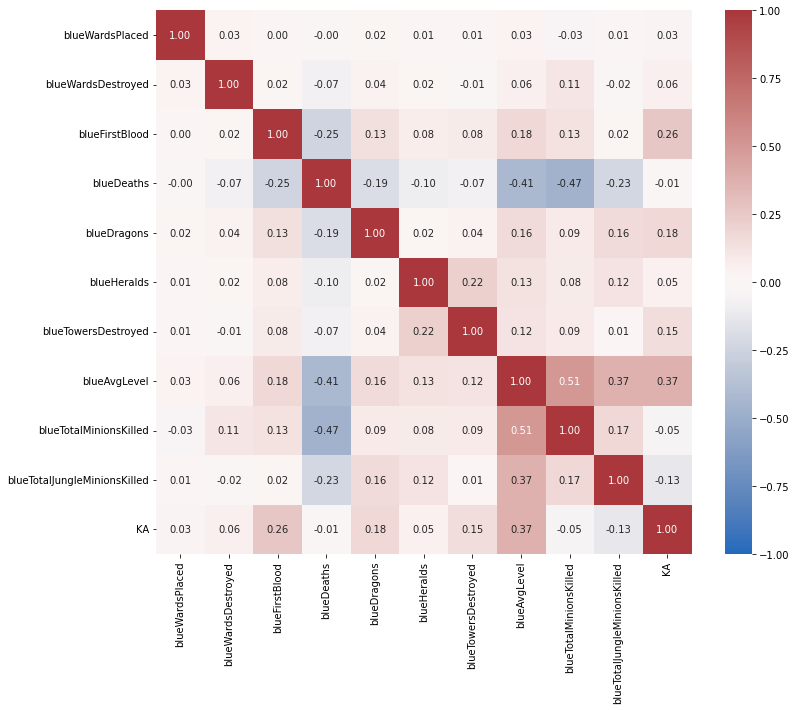

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(blue_data_cleaned.drop("blueWins",axis=1).corr(),cmap='vlag', annot=True, fmt='.2f', vmin=-1)

## Outliers <a id="33"></a>

We note some outliers. 
We will remove them if judged not relevant.
* blueWardsPlaced
* blueWardsDestroyed
* blueDeath
* blueTowerDestroyed
* KA

In [22]:
#Copy
blue_no_outliers = blue_data_cleaned.copy()

### WardsPlaced

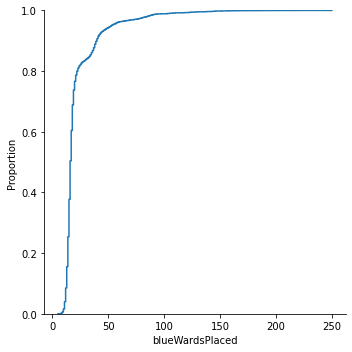

In [23]:
sns.displot(blue_no_outliers['blueWardsPlaced'],kind="ecdf")

We see that in some games, blue players has placed a lot of wards (more than 100 below 10min, which is not usual in a normal game).  
Sometimes, players decide to not play anymore because they judge the game as already lost. So it is likely they place wards in base or whatever waiting for the game to end.  

For this reason, let's remove everything above 99% 

In [24]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsPlaced'] <= np.quantile(blue_no_outliers['blueWardsPlaced'],q=0.99)]

In [25]:
print("We've just removed {} games considering Wards Placed outliers".format(raw_data.shape[0] - blue_no_outliers.shape[0]))

We've just removed 93 games considering Wards Placed outliers


### blueWardsDestroyed

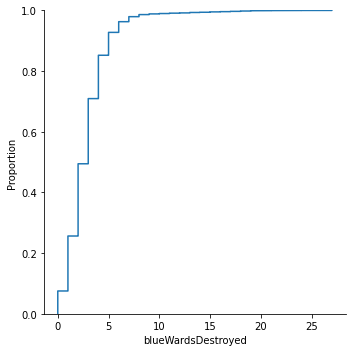

In [26]:
sns.displot(blue_no_outliers['blueWardsDestroyed'],kind="ecdf")

In [27]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsDestroyed'] <= np.quantile(blue_no_outliers['blueWardsDestroyed'],q=0.99)]

### blue Deaths

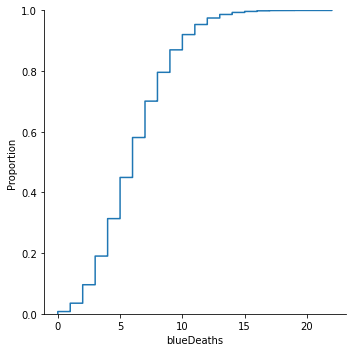

In [28]:
sns.displot(blue_no_outliers['blueDeaths'],kind="ecdf")

We will remove these outliers too because generally, when a team decides to give up, they're giving kills, leading to their defeat.  
We will remove these outliers to consider more fair games only.

In [29]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueDeaths'] <= np.quantile(blue_no_outliers['blueDeaths'],q=0.99)]

### blue Tower Destroyed

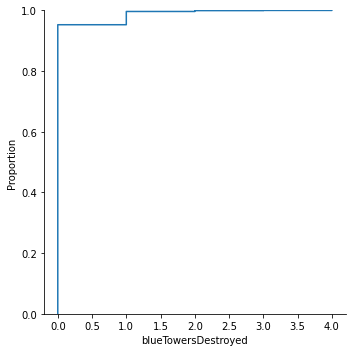

In [30]:
sns.displot(blue_no_outliers['blueTowersDestroyed'],kind="ecdf")

In regards of the low possibilites which can occur : until 4 towers destroyed, we will keep these outliers.   
Generally, when a team give up, they stay in base and let the enemy team pushs lanes until the Nexus, destroying turrets. 

### Kill & Assists (KA)

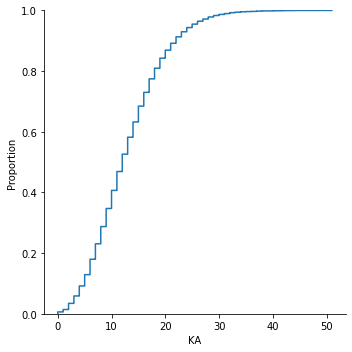

In [31]:
sns.displot(blue_no_outliers['KA'],kind="ecdf")

In [32]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['KA'] <= np.quantile(blue_no_outliers['KA'],q=0.99)]

How many games/row did we removed ?

In [33]:
print("We have removed {} rows from the inital dataset".format(raw_data.shape[0] - blue_no_outliers.shape[0]))

We have removed 319 rows from the inital dataset


## Target balance <a id="34"></a>
In order to create a relevant model, let's check if the target is well balanced between 0 & 1

In [34]:
#Save
blue_balanced = blue_no_outliers.copy()

In [35]:
print("In this current Dataset, there is {0:.3f}% of won games".format(
    blue_balanced['blueWins'].sum() / blue_balanced['blueWins'].shape[0]
    )
)

In this current Dataset, there is 0.499% of won games


The Target is well balanced !

# Logistic regression analysis 

In [36]:
#Save
blue_data_scaled = blue_balanced.copy()

In [37]:
#Target
blue_target = blue_balanced['blueWins']

In [38]:
#Features
blue_features = blue_balanced.drop(['blueWins'],axis=1)

## Standardization <a id="41"></a>

In [39]:
scaler = StandardScaler()
scaler.fit(blue_features)

blue_features_scaled = scaler.transform(blue_features)

In [40]:
blue_features_scaled.mean(axis=0)

array([ 9.21624469e-17, -1.78378929e-17, -7.43245539e-18,  1.07770603e-16,
       -6.13177570e-17,  6.24326253e-17,  1.41216653e-17, -9.37975871e-16,
        4.15102634e-16,  3.38827060e-16, -3.97636364e-17])

In [41]:
blue_features_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Standardization worked

## Train Test Split <a id="42"></a>
(not used yet because we just want to get feature's weights)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(blue_features_scaled,blue_target, random_state=42, test_size=0.10)

## Logistic regression <a id="43"></a>
With this first model, we will be able to calculate each feature's weight, therefore to estimate the influence of this feature on the winning condition

In [43]:
#Training
#We take all the dataset to calculate the Weight of each feature
logReg = LogisticRegression()
logReg.fit(blue_features_scaled,blue_target)

LogisticRegression()

In [44]:
#Accuracy
logReg.score(blue_features_scaled,blue_target)

0.7120292887029289

We obtain an accuracy of 71% which is relatively good.

## Weights <a id="44"></a>

In [45]:
blue_weights = pd.DataFrame()
blue_weights['Features'] = blue_features.columns
blue_weights['Weights'] = logReg.coef_.reshape(11,1)


In [46]:
blue_weights.sort_values(by='Weights',ascending=False)


,Features,Weights
10,KA,0.667221
7,blueAvgLevel,0.253446
4,blueDragons,0.227709
8,blueTotalMinionsKilled,0.152652
9,blueTotalJungleMinionsKilled,0.138042
6,blueTowersDestroyed,0.119598
2,blueFirstBlood,0.083464
5,blueHeralds,0.048755
1,blueWardsDestroyed,0.018473
0,blueWardsPlaced,-0.051440


## Observations <a id="45"></a>

With this table, we are now able to identify which actions the blue player has to take to win before 10min :
* It seems that kills and deaths are the main cause of wins and loses, which is pretty logical because of the gold and experience gaps it creates.   
* The average level is also a good indicator if the game is won or lost. However, we have to be careful with this value because winning leads to a higher average level (kills gives a ton of experiences).
* We can also think that valuing experience can lead to a win. For example, usualy, players have to make a choice between taking a risk leading to gaining or losing a ton of gold and experience (make a play and try to kill the enemy / roaming / invading), or they can play safe. It is therefore possible that playing safe and valuing experience by killing minions only could be a good decision to win the game later. Indeed, the game is actually more about punishing enemy mistakes than making high value plays.


**To wrap it up**
* It should be interested to study if the win & experience (average level) work in both ways : exp <=> wins. Indeed, we know that winning leads to high levels. However, do decisions leading to experience gain only (like farming minions for instance, and not killing enemy players) tends to increase the probability to win the game. 
* Also, getting the first drake in the game tends to increase the probability of winning, in opposite to the herald. This fact is pretty weird because in season 11/12, obtaining herald leads to destroying turrets, therefore golds for the entire team and map pressure, which is decisive for the win. This results should be investigated.
* Finally, warding doesn't seem to have a huge weight on the winning condition before 10 min, which could be denied due to a lot of advices from game coachs. This fact should be studied too. 

# Deeper analysis <a id="5"></a>

## Wards impact <a id='41'></a>
We are going to check how many games are won regarding of warding (placed & destroyed)

In [47]:
#Let's take the data cleaned without outliers
blue_data_wards = blue_no_outliers.copy()

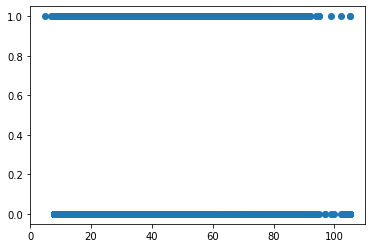

In [48]:
#scatter 
plt.scatter(x=blue_data_wards['blueWardsPlaced'],y=blue_data_wards['blueWins'])

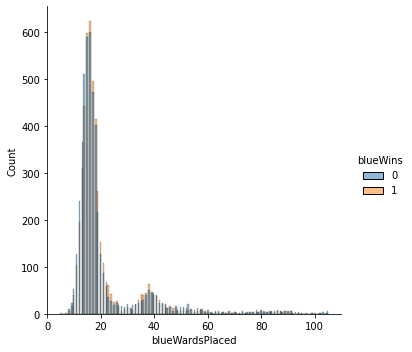

In [49]:
#Warding histogram
sns.displot(blue_data_wards,x='blueWardsPlaced',hue='blueWins')

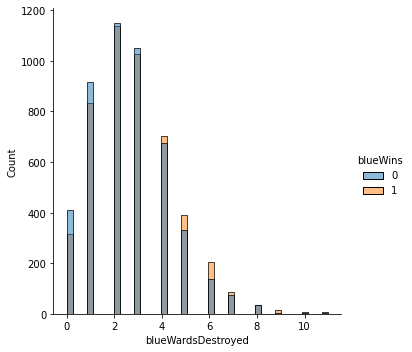

In [50]:
#Wards destroyed histogram
sns.displot(data=blue_data_wards,x='blueWardsDestroyed',hue='blueWins')

Let's calculate the median

In [51]:
median_wards_placed = np.median(blue_data_wards['blueWardsPlaced'])
median_wards_destroyed = np.median(blue_data_wards['blueWardsDestroyed'])
print("The median of placed wards is {}".format(median_wards_placed) )
print("The median of destroyed wards is {}".format(median_wards_destroyed))

The median of placed wards is 16.0
The median of destroyed wards is 3.0


With medians, we consider 2 types of map control teams : bad ones and good ones

In [52]:
blue_data_wards['Placed Wards'] = blue_data_wards['blueWardsPlaced'].apply(lambda x: 1 if x> median_wards_placed else 0)
blue_data_wards['Destroyed Wards'] = blue_data_wards['blueWardsDestroyed'].apply(lambda x: 1 if x > median_wards_destroyed else 0 )

In [53]:
print(blue_data_wards.loc[blue_data_wards["Destroyed Wards"]==1]['blueWins'].sum())
print(blue_data_wards.loc[blue_data_wards["Destroyed Wards"]==0]['blueWins'].sum())

1451
3318


In [54]:
#% won games depending on placed wards
blue_highWardsPlaced = blue_data_wards.loc[blue_data_wards["Placed Wards"]==1]["blueWins"].sum() / blue_data_wards.loc[blue_data_wards["Placed Wards"]==1].shape[0]
blue_lowWardsPlaced =  blue_data_wards.loc[blue_data_wards["Placed Wards"]==0]["blueWins"].sum() / blue_data_wards.loc[blue_data_wards["Placed Wards"]==0].shape[0]
print("% won games considering high warding team : {0:.02f}%".format(blue_highWardsPlaced*100))
print("% won games considering low warding team : {0:.02f}%".format(blue_lowWardsPlaced*100)) 

% won games considering high warding team : 51.70%
% won games considering low warding team : 48.13%


As we can see, warding leads to a small increase in the probability to win the game.

In [55]:
#%won game depending on destroyed wards
blue_highWardsDestroyed = blue_data_wards.loc[blue_data_wards["Destroyed Wards"]==1]["blueWins"].sum() / blue_data_wards.loc[blue_data_wards["Destroyed Wards"]==1].shape[0]
blue_lowWardsDestroyed = blue_data_wards.loc[blue_data_wards["Destroyed Wards"]==0]["blueWins"].sum() / blue_data_wards.loc[blue_data_wards["Destroyed Wards"]==0].shape[0]
print("% won games considering high wards destroying team : {0:.02f}%".format(blue_highWardsDestroyed*100))
print("% won games considering low wards destroying team : {0:.02f}%".format(blue_lowWardsPlaced*100)) 

% won games considering high wards destroying team : 53.44%
% won games considering low wards destroying team : 48.13%


Destroying wards denies vision for the enemy team increasing ganks success.  
As we can see, destroying wards increases the probability to win the game. 

## Epic monsters <a id='52'></a>
Drake & Herald

In [56]:
blue_data_epic_monsters = blue_no_outliers.copy()

In [57]:
blue_data_epic_monsters.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueDeaths', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed',
       'blueAvgLevel', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'KA'],
      dtype='object')

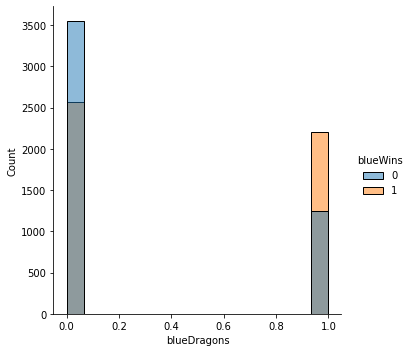

In [58]:
#Let's calculate the % of wins regarding the number of drakes and herald taken
sns.displot(data=blue_data_epic_monsters,x='blueDragons',hue='blueWins')

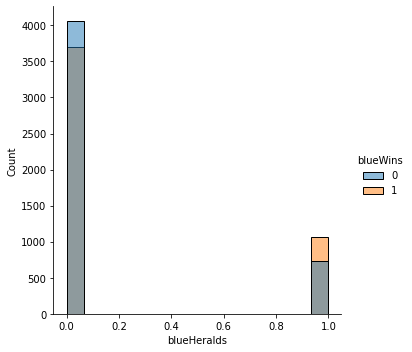

In [59]:
sns.displot(data=blue_data_epic_monsters,x='blueHeralds',hue='blueWins')

In [60]:
#Let's calculate the % of wins depending of epic monsters taken before 10 min
blueDragons0 = blue_data_epic_monsters.loc[blue_data_epic_monsters['blueDragons']==0]['blueWins'].sum() / blue_data_epic_monsters.loc[blue_data_epic_monsters['blueDragons']==0].shape[0]
blueDragons1 = blue_data_epic_monsters.loc[blue_data_epic_monsters['blueDragons']==1]['blueWins'].sum() / blue_data_epic_monsters.loc[blue_data_epic_monsters['blueDragons']==1].shape[0]
blueHeralds0 = blue_data_epic_monsters.loc[blue_data_epic_monsters['blueHeralds']==0]['blueWins'].sum() / blue_data_epic_monsters.loc[blue_data_epic_monsters['blueHeralds']==0].shape[0]
blueHeralds1 = blue_data_epic_monsters.loc[blue_data_epic_monsters['blueHeralds']==1]['blueWins'].sum() / blue_data_epic_monsters.loc[blue_data_epic_monsters['blueHeralds']==1].shape[0]

print(blueDragons0,blueDragons1,blueHeralds0,blueHeralds1)

0.4192175478801768 0.6398145465082585 0.4769389332646225 0.5934371523915462


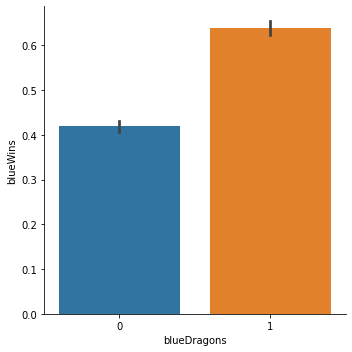

In [61]:
#%win depending of number of dragon taken
sns.catplot(data=blue_data_epic_monsters,kind='bar',x='blueDragons',y='blueWins')

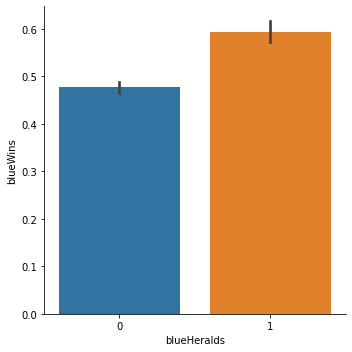

In [62]:
#%win depending of number of herald taken
sns.catplot(data=blue_data_epic_monsters,kind='bar',x='blueHeralds',y='blueWins')

What if the blue team get the drake and the herald before 10min

In [63]:
#Condition Herald=1 Dragon=1
blueDragonHerald = blue_data_epic_monsters.loc[(blue_data_epic_monsters['blueDragons']==1) & (blue_data_epic_monsters['blueHeralds']==1),'blueWins'].sum() / blue_data_epic_monsters.loc[(blue_data_epic_monsters['blueDragons']==1) & (blue_data_epic_monsters['blueHeralds']==1),'blueWins'].shape[0]

In [64]:
print("Getting the first drake and herald increase the % of victory to {0:.01f}%".format(blueDragonHerald*100))

Getting the first drake and herald increase the % of victory to 73.4%


As we can see, 
* getting the first drake leads to a 64% chance of winning
* getting the first herald leads to a 59% chance of winning
* getting both leads to a % of victory of 73.4%

Therefore, drake should be prioritize between epic monsters.  
To secure it, it should be good to pick champions in midlane and botlane who can get priority more constitently.  

Hypothesis :
Drake is not what creates lead, but fights around this objective lead to kills therefore huge advantages (as we can see in the weights list)




## Turrets <a id='53'></a>

In [65]:
blue_data_turrets = blue_no_outliers.copy()

In [66]:
blue_data_turrets.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueDeaths', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed',
       'blueAvgLevel', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'KA'],
      dtype='object')

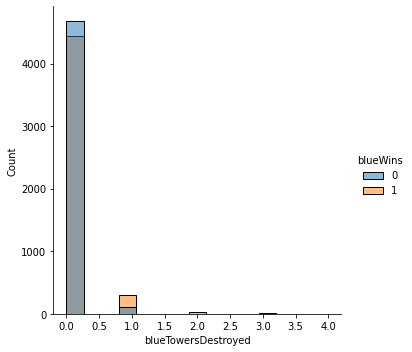

In [67]:
#Distribution
sns.displot(data = blue_data_turrets, x='blueTowersDestroyed',hue='blueWins')

In [68]:
#Unique value
blue_data_turrets['blueTowersDestroyed'].value_counts()

0    9120
1     409
2      24
3       6
4       1
Name: blueTowersDestroyed, dtype: int64

We are going to calculate the % of victory depending of the number of destroyed towers.  
However, it would be preferable to not take into account 4 turrets destroyed, because, it happened in only one game.  
Also, it is important to remain cautious with the result we are going to obtain with 3 turrets destroyed, because of the low number of games where this happend

In [69]:
#Victory %
blue_destroyedTurretVictory0 = blue_data_turrets.loc[blue_data_turrets["blueTowersDestroyed"] == 0,"blueWins"].sum() / blue_data_turrets.loc[blue_data_turrets["blueTowersDestroyed"] == 0,"blueWins"].shape[0]
blue_destroyedTurretVictory1 = blue_data_turrets.loc[blue_data_turrets["blueTowersDestroyed"] == 1,"blueWins"].sum() / blue_data_turrets.loc[blue_data_turrets["blueTowersDestroyed"] == 1,"blueWins"].shape[0]
blue_destroyedTurretVictory2 = blue_data_turrets.loc[blue_data_turrets["blueTowersDestroyed"] == 2,"blueWins"].sum() / blue_data_turrets.loc[blue_data_turrets["blueTowersDestroyed"] == 2,"blueWins"].shape[0]

print("The probability to win with 0 turrets at 10min is {0:.1f}%".format(blue_destroyedTurretVictory0*100))
print("The probability to win with 1 turrets at 10min is {0:.1f}%".format(blue_destroyedTurretVictory1*100))
print("The probability to win with 2 turrets at 10min is {0:.1f}%".format(blue_destroyedTurretVictory2*100))


The probability to win with 0 turrets at 10min is 48.7%
The probability to win with 1 turrets at 10min is 72.9%
The probability to win with 2 turrets at 10min is 95.8%


We notice that getting a turret at 10 min leads to the victory almost three games on four (3/4), which is very high.
If 2 turrets are destroyed, the game is nearly already finished.  
It is important to note that getting turret gives a lot of gold for the entire team, but also, apply pressure to the enemy team. Indeed, minions can therefore move further into the enemy lanes, which means that opponents have to collect them nearest their base, allowing blue team to gain control over the map.  

It is aswell important to note that turrets gain bonus armors below 5min in the game, which means that focusing a turret at the beginning of the game to gain a clear advantage is no longer possible (this "cheesy" move was highly used in World Championship back in previous seasons)

## First blood <a id='54'></a>

First blood is the first death of the game.  
Obtaining first blood gives a small advantage of 100gold for the team which made the kill.

In [70]:
blue_data_first_blood = blue_no_outliers.copy()

In [71]:
blue_first_blood_victory = blue_data_first_blood.loc[blue_data_first_blood["blueFirstBlood"]==1,"blueWins"].sum() / blue_data_first_blood.loc[blue_data_first_blood["blueFirstBlood"]==1].shape[0]

print("The probability of the blue team to win if they got First Blood is about {0:.02f}%".format(blue_first_blood_victory*100))

The probability of the blue team to win if they got First Blood is about 59.76%


Obtaining First Blood gives a small advantage as we said previously, but also, getting killed this early in the game has huge consequences for the player. Because of his early death, he loses a ton of experience & gold because he is not farming (killing opposite minions).   

It is useful to note that levels gain at early stage is faster than later in the game. This fact makes critical the experience at early stage of the game. A first blood at the beginning can lead to a huge gap of level between the two players in the same lane.

# Red side <a id='6'></a>

Now we have studied the blue side statistics, we are going to study red side.  
To do so, we are going to focus on % of victory for this side by taking into account relevant features as we have done previously for the blue side :
* First Blood
* Turrets destroyed
* Epic monsters
* Warding (destroyed and placed)

To do so, we have to prepare the dataset :
* blue only (list above) + target
* drop everything not used
* outliers
* % victory

## Prepare the data <a id='61'></a>

In [72]:
red_columns = []
for col in raw_data.columns:
    if 'red' in col:
        red_columns.append(col)

In [73]:
red_columns

['redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [74]:
#Build the dataset with features and target
data_red_side = raw_data[red_columns]
data_red_side.head()

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [75]:
#For the target, because it is the blue side, 1 => 0 & 0 => 1
data_red_side["redWins"] = raw_data['blueWins'].map({1:0,0:1})
data_red_side.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,redWins
0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7,1
1,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,1
2,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,1
3,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8,1
4,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,1


In [76]:
#We create the dataset for the features we picked and the target
red_features = ["redWardsPlaced","redWardsDestroyed","redFirstBlood","redDragons","redHeralds",'redTowersDestroyed','redWins']
data_red_relevant_features_only = data_red_side[red_features]
#We add the target to this new df
# data_red_relevant_features_only["redWins"] = data_red_side['redWins']
data_red_relevant_features_only.head()

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redDragons,redHeralds,redTowersDestroyed,redWins
0,15,6,0,0,0,0,1
1,12,1,1,1,1,1,1
2,15,3,1,0,0,0,1
3,15,2,1,0,0,0,1
4,17,2,1,1,0,0,1


In [77]:
#Shape
data_red_relevant_features_only.shape

(9879, 7)

## Outliers <a id='62'></a>

In [78]:
#Quantiles for Warding columns
red_quantiles = []
for col in red_features:
    if "Wards" in col:
        red_quantiles.append(data_red_relevant_features_only[col].quantile(q=0.99))
red_quantiles


[104.0, 10.0]

In [79]:
#Remove everything above quantiles
data_red_cleaned = data_red_relevant_features_only.loc[data_red_relevant_features_only["redWardsPlaced"]<=red_quantiles[0]]
data_red_cleaned = data_red_relevant_features_only.loc[data_red_relevant_features_only['redWardsDestroyed']<=red_quantiles[1]]
print("We removed {} rows from the original dataset considering warding only".format(data_red_relevant_features_only.shape[0] - data_red_cleaned.shape[0]))

We removed 98 rows from the original dataset considering warding only


In [80]:
data_red_cleaned

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redDragons,redHeralds,redTowersDestroyed,redWins
0,15,6,0,0,0,0,1
1,12,1,1,1,1,1,1
2,15,3,1,0,0,0,1
3,15,2,1,0,0,0,1
4,17,2,1,1,0,0,1
...,...,...,...,...,...,...,...
9873,16,6,0,0,0,0,0
9874,46,3,0,0,0,0,0
9876,14,0,1,1,0,0,1
9877,66,4,0,0,0,0,1


## % Victory <a id='63'></a>

In [81]:
#FirstBlood
red_first_blood_victory = data_red_cleaned.loc[data_red_cleaned["redFirstBlood"]==1,"redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["redFirstBlood"]==1].shape[0]
print("The probability of the red team to win if they got First Blood is about {0:.02f}%".format(red_first_blood_victory*100))

print("-----------------------------")

#Turret destroyed
red_DestroyedTurretVictory0 = data_red_cleaned.loc[data_red_cleaned["redTowersDestroyed"] == 0,"redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["redTowersDestroyed"] == 0,"redWins"].shape[0]
red_DestroyedTurretVictory1 = data_red_cleaned.loc[data_red_cleaned["redTowersDestroyed"] == 1,"redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["redTowersDestroyed"] == 1,"redWins"].shape[0]
red_DestroyedTurretVictory2 = data_red_cleaned.loc[data_red_cleaned["redTowersDestroyed"] == 2,"redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["redTowersDestroyed"] == 2,"redWins"].shape[0]
print("The probability to win with 0 turrets at 10min is {0:.1f}%".format(red_DestroyedTurretVictory0*100))
print("The probability to win with 1 turrets at 10min is {0:.1f}%".format(red_DestroyedTurretVictory1*100))
print("The probability to win with 2 turrets at 10min is {0:.1f}%".format(red_DestroyedTurretVictory2*100))

print("-----------------------------")

#Epic monsters
red_Dragons0 = data_red_cleaned.loc[data_red_cleaned['redDragons']==0]['redWins'].sum() / data_red_cleaned.loc[data_red_cleaned['redDragons']==0].shape[0]
red_Dragons1 = data_red_cleaned.loc[data_red_cleaned['redDragons']==1]['redWins'].sum() / data_red_cleaned.loc[data_red_cleaned['redDragons']==1].shape[0]
red_Heralds0 = data_red_cleaned.loc[data_red_cleaned['redHeralds']==0]['redWins'].sum() / data_red_cleaned.loc[data_red_cleaned['redHeralds']==0].shape[0]
red_Heralds1 = data_red_cleaned.loc[data_red_cleaned['redHeralds']==1]['redWins'].sum() / data_red_cleaned.loc[data_red_cleaned['redHeralds']==1].shape[0]
red_DragonHerald = data_red_cleaned.loc[(data_red_cleaned['redDragons']==1) & (data_red_cleaned['redHeralds']==1),'redWins'].sum() / data_red_cleaned.loc[(data_red_cleaned['redDragons']==1) & (data_red_cleaned['redHeralds']==1),'redWins'].shape[0]
print("The probability to win with 0 drake at 10min is {0:.01f}%".format(red_Dragons0*100))
print("The probability to win with 1 drake at 10min is {0:.01f}%".format(red_Dragons1*100))
print("The probability to win with 0 herald at 10min is {0:.01f}%".format(red_Heralds0*100))
print("The probability to win with 1 herald at 10min is {0:.01f}%".format(red_Heralds1*100))
print("The probability to win with 1 drake and 1 herald at 10min is {0:.01f}%".format(red_DragonHerald*100))

print("-----------------------------")

#Warding
red_median_wards_placed = np.median(data_red_cleaned['redWardsPlaced'])
red_median_wards_destroyed = np.median(data_red_cleaned['redWardsDestroyed'])
print("The median of placed wards is {}".format(red_median_wards_placed) )
print("The median of destroyed wards is {}".format(red_median_wards_destroyed))    

data_red_cleaned['Placed Wards'] = data_red_cleaned['redWardsPlaced'].apply(lambda x: 1 if x> red_median_wards_placed else 0)
data_red_cleaned['Destroyed Wards'] = data_red_cleaned['redWardsDestroyed'].apply(lambda x: 1 if x > red_median_wards_destroyed else 0 )

red_highWardsPlaced = data_red_cleaned.loc[data_red_cleaned["Placed Wards"]==1]["redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["Placed Wards"]==1].shape[0]
red_lowWardsPlaced= data_red_cleaned.loc[data_red_cleaned["Placed Wards"]==0]["redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["Placed Wards"]==0].shape[0]
red_highWardsDestroyed =  data_red_cleaned.loc[data_red_cleaned["Destroyed Wards"]==1]["redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["Destroyed Wards"]==1].shape[0]  
red_lowWardsDestroyed = data_red_cleaned.loc[data_red_cleaned["Destroyed Wards"]==0]["redWins"].sum() / data_red_cleaned.loc[data_red_cleaned["Destroyed Wards"]==0].shape[0]

#% won games depending on placed wards
print("% won games considering high warding team : {0:.01f}%".format(red_highWardsPlaced*100))
print("% won games considering low warding team : {0:.01f}%".format(red_lowWardsPlaced*100))
#%won game depending on destroyed wards
print("% won games considering high wards destroying team : {0:.01f}%".format(red_highWardsDestroyed*100))
print("% won games considering low wards destroying team : {0:.01f}%".format(red_lowWardsDestroyed*100)) 


The probability of the red team to win if they got First Blood is about 60.33%
-----------------------------
The probability to win with 0 turrets at 10min is 49.0%
The probability to win with 1 turrets at 10min is 76.2%
The probability to win with 2 turrets at 10min is 75.9%
-----------------------------
The probability to win with 0 drake at 10min is 41.3%
The probability to win with 1 drake at 10min is 62.6%
The probability to win with 0 herald at 10min is 48.0%
The probability to win with 1 herald at 10min is 61.2%
The probability to win with 1 drake and 1 herald at 10min is 71.2%
-----------------------------
The median of placed wards is 16.0
The median of destroyed wards is 2.0
% won games considering high warding team : 52.4%
% won games considering low warding team : 47.9%
% won games considering high wards destroying team : 53.7%
% won games considering low wards destroying team : 46.9%


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Compare Red & Blue sides <a id='7'></a>
We ensure that features are ordered the same way

## % Victory <a id='71'></a>

In [82]:
#Red side
#We multiply by 100 to get %
red_victoryRate = np.array([red_first_blood_victory,
    red_DestroyedTurretVictory0,
    red_DestroyedTurretVictory1,
    red_DestroyedTurretVictory2,
    red_Dragons0,
    red_Dragons1,
    red_Heralds0,
    red_Heralds1,
    red_DragonHerald,
    red_highWardsPlaced,
    red_lowWardsPlaced,
    red_highWardsDestroyed,
    red_lowWardsDestroyed
    ])*100  

red_victoryRate

array([60.33057851, 49.01459465, 76.16438356, 75.86206897, 41.31078961,
       62.58654797, 47.99270073, 61.24279308, 71.23098202, 52.35839341,
       47.88875355, 53.71972318, 46.8683343 ])

In [83]:
#Blue side
#We multiply by 100 to get %
blue_victoryRate = np.array([blue_first_blood_victory,
    blue_destroyedTurretVictory0,
    blue_destroyedTurretVictory1,
    blue_destroyedTurretVictory2,
    blueDragons0,
    blueDragons1,
    blueHeralds0,
    blueHeralds1,
    blueDragonHerald,
    blue_highWardsPlaced,
    blue_lowWardsPlaced,
    blue_highWardsDestroyed,
    blue_lowWardsDestroyed
    ])*100

blue_victoryRate

array([59.7550851 , 48.69517544, 72.8606357 , 95.83333333, 41.92175479,
       63.98145465, 47.69389333, 59.34371524, 73.36244541, 51.70140366,
       48.12680115, 53.44383057, 48.4733382 ])

In [84]:
#Dataframe
index_features = ['FirstBlood','0 Turret Destroyed','1 Turret Destroyed','2 Turrets Destroyed', '0 Dragon', '1 Dragon','0 Herald', "1 Herald", "Dragon & Herald", "High warding", "Low warding", "High wards destroying",'Low wards destroying'] 
VictoryRate_BlueRed = pd.DataFrame(index=index_features,)

VictoryRate_BlueRed["Blue"] = np.round(blue_victoryRate,1)
VictoryRate_BlueRed['Red'] = np.round(red_victoryRate,1)

#Sort based on Blue Stats


VictoryRate_BlueRed

,Blue,Red
FirstBlood,59.8,60.3
0 Turret Destroyed,48.7,49.0
1 Turret Destroyed,72.9,76.2
2 Turrets Destroyed,95.8,75.9
0 Dragon,41.9,41.3
1 Dragon,64.0,62.6
0 Herald,47.7,48.0
1 Herald,59.3,61.2
Dragon & Herald,73.4,71.2
High warding,51.7,52.4


In [85]:
VictoryRate_BlueRed.sort_values(by="Blue",ascending=False)

,Blue,Red
2 Turrets Destroyed,95.8,75.9
Dragon & Herald,73.4,71.2
1 Turret Destroyed,72.9,76.2
1 Dragon,64.0,62.6
FirstBlood,59.8,60.3
1 Herald,59.3,61.2
High wards destroying,53.4,53.7
High warding,51.7,52.4
0 Turret Destroyed,48.7,49.0
Low wards destroying,48.5,46.9


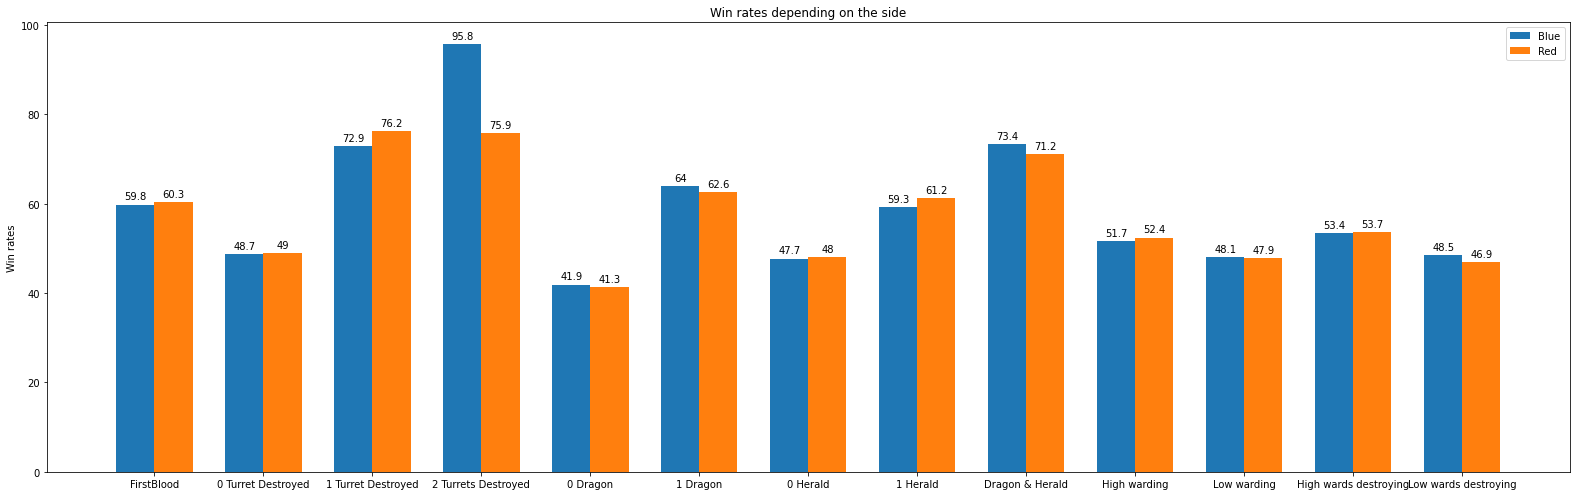

In [86]:
#Plot
labels = index_features
Blue = VictoryRate_BlueRed['Blue']
Red = VictoryRate_BlueRed['Red']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(22, 7))
rects1 = ax.bar(x - width/2, Blue, width, label='Blue')
rects2 = ax.bar(x + width/2, Red, width, label='Red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win rates')
ax.set_title('Win rates depending on the side')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


## Correction & Verification <a id='72'></a>

### Weird difference between Blue & Red for 2 turrets destroyed
There's a large gap for 2 turrets destroyed.  
Let's check the difference between blue and red when 2 turrets are down.

In [87]:
#Let's check red turrets 2 (75.9% seems vey low)
data_red_cleaned.loc[data_red_cleaned['redTowersDestroyed']==2,"redWins"].value_counts()


1    22
0     7
Name: redWins, dtype: int64

In [88]:
blue_data_cleaned.loc[(blue_data_cleaned[ 'blueTowersDestroyed']==2) , "blueWins"].value_counts()

1    26
0     1
Name: blueWins, dtype: int64

In [89]:
data_red_cleaned.shape[0]

9781

We notice that they are only few games when 2 turrets are down (only 29 for redside & 27 for blue side on 9781) for both sides.  
Therefore, it would be better to not take into account 2 turrets down in the game.

In [90]:
#Let's drop 2 turrets destroyed
VictoryRate_BlueRed = VictoryRate_BlueRed.drop(labels=['2 Turrets Destroyed'],axis=0)
index_features.remove('2 Turrets Destroyed')

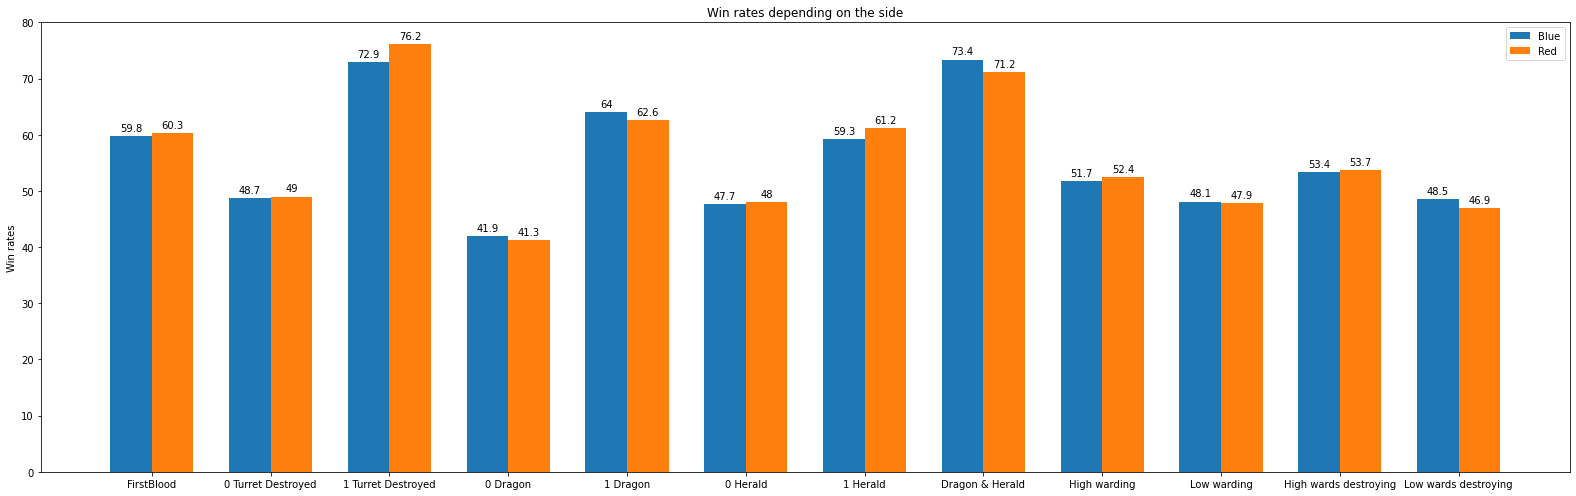

In [91]:
#Plot
labels = index_features
Blue = VictoryRate_BlueRed['Blue']
Red = VictoryRate_BlueRed['Red']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(22, 7))
rects1 = ax.bar(x - width/2, Blue, width, label='Blue')
rects2 = ax.bar(x + width/2, Red, width, label='Red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win rates')
ax.set_title('Win rates depending on the side')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


### Let's check Dragon & Herald taken to see if they 're enough data to consider this win rate

In [92]:
data_red_cleaned.loc[(data_red_cleaned["redDragons"]==1) & (data_red_cleaned['redHeralds']==1),"redWins"].value_counts()

1    515
0    208
Name: redWins, dtype: int64

It's ok !

## Analyse <a id='73'></a>


It seems that in general, getting epic monsters is the key for a fast victory, as well as First blood.

### Epic Monsters
* Getting epic monsters often leads to teamfight in the river to get it. Lanes around the objective (Top & Mid for Herald / Bot & Mid for Drake) gather to not let the enemy obtaining this objective. These fights generally lead to a side winning over the other side, causing deaths for the losing team. Therefore, as we explained previously, losing team gets a delay in xp & gold because of opponent minions getting killed by their own towers and minions. 
* Furthermore, winning or losing a teamfight at these objectives (herald & drake) is generally highly dependent on who moves first ! Champions on lanes can only move first if they have pushed the lane, which means killing all opposite minions and guiding their own under the enemy tower to get killed. In this way, they diminish the loss of xp & gold because the wave will "bounce back". If they don't push before moving, they could lose a ton of xp & gold, especially if they lose the teamfight.  
* To conclude, picking champions who can push fast at early level (control mages generally) and thus controlling the lane (counter pick for instance) should be a good way to obtain lead before 10min safely. Broadly speaking, controling the wave (with any champ) should be the priority to increase the probability to win the game !

### First blood
* Getting the first kill of the game gives a huge advantage, by denying the opponent xp, gold, and giving 100 more gold for the killer.
* Because xp is more important at the beginning of the game, killing the opponent early means taking a huge advantage, which will remain during the game.
* It is important to notice that getting the kill could be dangerous, because it involves taking risks (losing the fight or being ganked at the same time). Compared to farming only and obtaining lane control, this decision is way more risky, and could easily cause a lose.


# General conclusions <a id='8'></a>

We have decided to treat the following problem : which decisions team have to make before 10 min to increase their probability to win the game ?
We have analysed statistics from about 9000 games considering : gold, xp, epic monsters, turrets destruction, ward control, first blood, ...
From this study we can conclude with these points : 

### Gold & Experience
Gold, Experience & Kill/Assits are highly correlated with the win of the team which gets more.  
The more gold a team has, the more items they can buy, increasing significantly their stats.  
Levels, obtained with experience, attribute also a lot of stats for each champion. The higher the level, the stronger the champion is.

However, for our study, we are far more interested by which decision we have to take before 10min to increase the probability to win at the end of the game.

### Epic monsters

It appears that getting a drake or herald or both could tend the game to the win of the team which got it (them). We have to note that killing these monsters doesn't provide a significant amount of gold & experience by themselves. 

However Drakes give stats bonus for the team which got it (damage,movement speed,...) which are useful for future teamfights. Killing Herald gives the possibility to activate it near a tower and do severe damage to it, which can lead to tower destruction (as we can see in the table of correlations between herald and tower destruction). 

Furthermore, getting this objectives means fight for them. The result of this fight has a huge impact on the game, because the team who lost it loses also xp and gold due to the fact that minions, which gives this ressources, die to their own turrets/minions. 

In a nutshell, getting first drake or herald leads to a huge advantage, especially when a teamfight is won, which increases while the game is evolving (more gold & experience => more kills and objectives => more gold & experience).  

Which decision the team can make to get this epic monsters ? 

=> Obtaining these objectives generally means winning the teamfight for it in the river. Getting the priority in lane (push first to oblige the enemy laner to stay in lane and collect the farm under turret while it is killing them, denying gold) should be the correct way to ensure to win the teamfight. Arriving first means unbalanced teamfight. One way to ensure priority is to pick a counter of the enemy champion during the draft to gain control of the lane. An other way could be to ask the jungler to come help to push the lane before starting the epic monster. If the enemy team choose to follow anw, they could be suprised by the enemy team in the fog of war, and losing xp & gold because the lane is pushing against them, losing minions under the tower. 



### First turret destroyed

Destroying the first turret in the game increases significantly the probability to win.  
The reason is well-known :  

Turrets kill minions on lanes when they come closer, bouncing back the wave (because there are less minions on one side, the minions on the opposite side can kill them easily and move forward on the lane).  
Because champions/players have to collect gold & xp from minions deaths, they have to be there before turrets kill them, letting opponents doing moves on the map (warding, roaming, etc...)  
If the first turret on a lane is down, the team which lost it has to collect minions closer to their base, allowing opponents to have control on the map (vision with wards, ambushs,...).  
It is then relatively hard for the team to come back because they have to push the wave all the way to the opposite turret, becoming easy targets for the enemy team.  

Furthermore, turrets give a lot of gold during its destruction and when it is destroyed. 

We have to note that riot decides to equip turrets with a specific protection before 5min in the game, to avoid some early strategies consisting in gathering nearly the all team to destroy one turret and acquiring a huge early lead.

How player can use this information to win more games of League of Legends ?

As a laner, they should focus prioritarly on the lane by farming and hitting the opponent's turret. We saw that getting the first drake or herald gives a huge lead for the team which got it. However, this kind of plays are like coin flips. Indeed, teamfights are highly random when there is no communication between players A team could win or lose a huge advantage in the game with these risky choices. 
A safer and more consistent play should be to avoid these kind of fights this early in the game (even later) and to take advantage of the opponent missing to collect more farm/minions and destroying turrets.



### Warding

It appears that warding or destroying opponent wards before 10 min is not very relevant. However, vision is crucial in League of Legends games, but we could say that at 10min, fighting for vision doesn't lead significantly to more wins.

### Precautions

Games are highly random in League of Legends. No game is identical to the previous one, even if the map remains the same. It is like chess.  
Informations we got with this analyse are not universal because of many factors (afk, players psychology, etc...) and could be not true in certain situations.  
However, this analyse provides good trends of how to win games before 10min and should be used in accordance with the situation in the game and player's decisions.

# Personal note <a id='9'></a>

This project was my first one as a Data Scientist, and I appreciated to do it.  
I have played for nearly 10 years at League of Legends, thus this project fitted me well.  
I learned that having some background in the field I am interested in is mandatory to be a good data scientist.  
I learned also to organize EDA better and I am sure it will serve me well in the near future.  
Thank you for the reading.  
Jérémy

# Aknowledgement <a id='10'></a>

I would like to aknowledge the following works where I get inspiration & speed up my project :
* DR.PENGUIN - https://www.kaggle.com/xiyuewang/lol-how-to-win
* MEHDI GASMI - https://www.kaggle.com/servietsky/league-of-legends-what-to-do-in-first-10-min

I